In [1]:
import json
import os
import sys

import numpy as np
from matplotlib import pyplot as plt

In [2]:
res_dir_path = r"D:\ENTC\PROJECTS\Deep-Learning-for-End-to-End-Over-the-Air-Communications\Sequence Decoder"
EPS = 1e-6

def get_all_experiments_as_obj(experiment_name):
    res_dir_abs_path = os.path.join(res_dir_path,experiment_name)
    if False == os.path.exists(res_dir_abs_path):
        raise Exception("The experiment directory not found")
    
    all_experiment_rec_files = os.listdir(res_dir_abs_path)
    all_experiments = []
    

    for rec_file in all_experiment_rec_files:
            with open(os.path.join(res_dir_abs_path,rec_file),"r") as file:
                experiment_obj = json.load(file)
                all_experiments.append(experiment_obj)
                
    return all_experiments


def limit_properties(obj_list,interested_properties):
    new_objs = []
    for obj in obj_list:
        new_obj = dict()
        for prop in interested_properties:
            new_obj[prop] = obj[prop]
        new_objs.append(new_obj)
    return new_objs   


def stem_propeties(experiments_objs,feature_x,feature_y):
    x = []
    y = []
    for obj in experiments_objs:
        x.append(obj[feature_x])
        y.append(obj[feature_y])
        
    plt.stem(x,y)
    plt.show()

    # plot bit accuracy vs SNR for each CFO_coef
def comparative_plot(EXP,FEATURE_X,FEATURE_Y,COMPAR_VAR_NAME,stem=False):
    # COMPAR_VAR_NAME = "CFO_coef"
    # FEATURE_X = "SNR"
    # FEATURE_Y = "bit_accuracy"
    COMPAR_VAR_POOL = [0.1, 0.5, 1]
    collections = []
    for comp_var in COMPAR_VAR_POOL:
        filtered_exp = [exp for exp in EXP if exp[COMPAR_VAR_NAME] == comp_var]
        separated_exp = {
            "comp_var_name": COMPAR_VAR_NAME,
            "comp_var": comp_var,
            "exp_list": filtered_exp
        }
        collections.append(separated_exp)


    fig,ax = plt.subplots(1,1)
    for collection in collections:
        x = []
        y = []
        for exp in collection['exp_list']:
            x.append(exp[FEATURE_X])
            y.append(exp[FEATURE_Y])
        if stem:
            if not x:
                continue
            ax.stem(x,y)
        else:
            ax.plot(x,y,label=f'{collection["comp_var_name"]} = {collection["comp_var"]}')

    ax.grid()
    ax.legend()
    plt.show()

    
    
def stats_BLER(experiments):
    buffer = []
    for exp in experiments:
        buffer.append(exp['BLER'])
    return {"mean": np.array(buffer).mean(), 
            "min":np.array(buffer).min()}
    

## Full CFO

1

In [9]:
# EXP = [exp for exp in EXP if exp['n_epochs']==40 and exp["state_width"]==8]

In [40]:
testnames = ["nakagami-statewidth_8_-epochs(140)",
                "same-units-reduced-lr(1e-3)",
             "reduced-units-reduced_lr(1e-3)",
             "nakagami-statewidth_8_-really_low_lr_epochs(140)"
             
            ]

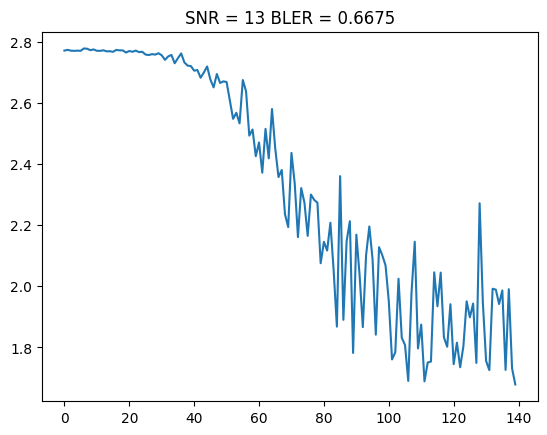

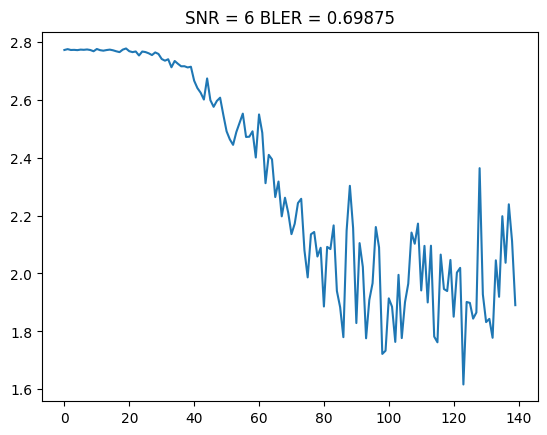

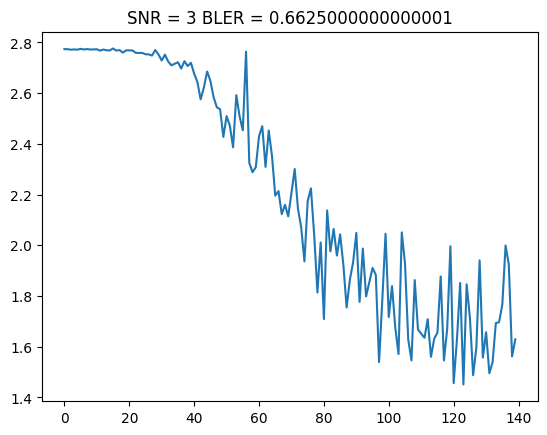

In [45]:
EXP = get_all_experiments_as_obj(testnames[-1]) 
for exp in EXP:
    exp["BLER"] = 1- exp["bit_accuracy"]
    
for exp in  EXP:
    jlist =  exp["J_list"]
    snr = exp["SNR"]
    bler = exp["BLER"]

    plt.plot(jlist)
    plt.title(f'SNR = {snr} BLER = {bler}' )
    plt.show()

In [14]:
stats_BLER(

            list(filter(lambda x: x['SNR']==6 and x['state_width']==8,
                    limit_properties(EXP,['SNR','state_width','CFO_coef',"BLER"])))

)

{'mean': 0.02046874999999998, 'min': 0.015312499999999951}

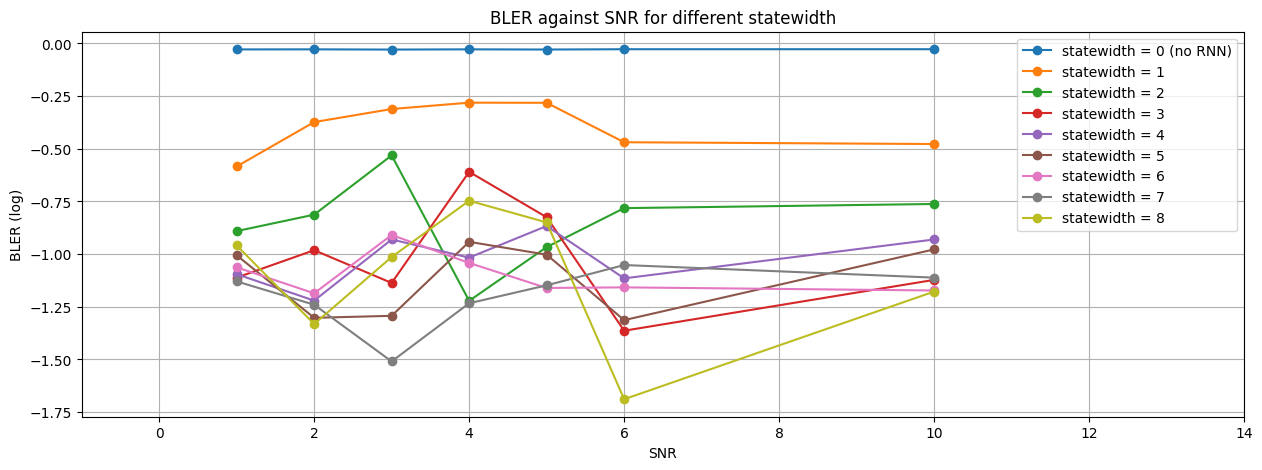

In [22]:
state_width_all = [0, 1, 2, 3, 4, 5, 6, 7, 8]
SNR_all         = [1, 2, 3, 4, 5, 6, 10]

all_graphs = []

for statewidth in state_width_all:
    
        log_bler_min_all = []
        
        for snr in SNR_all:

            bler_min = stats_BLER(

                                list(filter(lambda x: x['SNR']==snr and x['state_width']==statewidth,
                                        limit_properties(EXP,['SNR','state_width','CFO_coef',"BLER"])))

                                 )['mean']

            log_bler_min_all.append(np.log10(bler_min + EPS))
        all_graphs.append({
            "statewidth":statewidth,
            "SNR":SNR_all,
            "BLER_min":log_bler_min_all
            
        })
        

fig, ax = plt.subplots(1,figsize=(15,5))
for graph in all_graphs:
    statewidth = graph['statewidth']
    SNR        = graph['SNR']
    BLER_min   = graph['BLER_min']
    label = f'statewidth = {statewidth}' if statewidth>0 else f'statewidth = {statewidth} (no RNN)'
    ax.plot(SNR,BLER_min,label=label,marker="o")
    



ax.set_title("BLER against SNR for different statewidth")
ax.set_xlabel("SNR")
ax.set_ylabel("BLER (log)")
ax.set_xlim(-1,14)
ax.grid()
ax.legend(loc='upper right')
plt.show()

## Learning curves against satewidth

31

[]

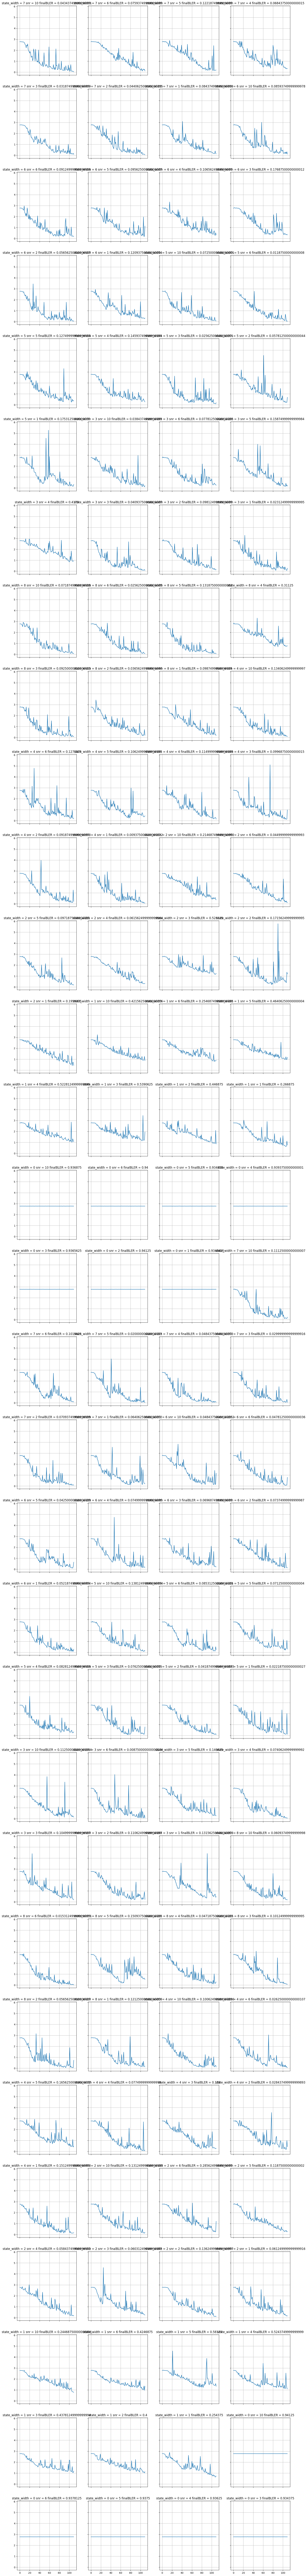

In [34]:
exp_index = 0 # start

fig, axs  = plt.subplots(len(EXP)//4,4,figsize=(20,25//2*len(EXP)//4//2),sharex=True, sharey=True)
for ax in np.ravel(axs):
    this_exp = EXP[::-1][exp_index]
    J_list = this_exp['J_list']
    state_width = this_exp['state_width']
    snr = this_exp['SNR']
    finalBLER = this_exp['BLER']
    
    ax.set_title(f'state_width = {state_width} snr = {snr} finalBLER = {finalBLER}')
    ax.plot(J_list)
    ax.grid()
    
    exp_index+=1
    

plt.plot()

In [27]:
2**16

65536

In [28]:
78700/65536

1.20086669921875